In [1]:
import cvxpy as cp
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
# see files without loading
sio.whosmat('month_data.mat')

[('monthly_norm_data', (1, 1), 'struct')]

In [3]:
# load mat files
mon = sio.loadmat('month_data.mat')
sol = sio.loadmat('solar_data.mat')

In [4]:
# check what is in the datasets
# mon.items()
print("Type of mat files is: "+str(type(mon)))
type(mon)
type(sol)
print("Month data keys are: "+str(mon.keys()))
print("Month data keys are: "+str(sol.keys()))
# mon.keys()
# sol.keys()

Type of mat files is: <class 'dict'>
Month data keys are: dict_keys(['__header__', '__version__', '__globals__', 'monthly_norm_data'])
Month data keys are: dict_keys(['__header__', '__version__', '__globals__', 'solar_data', 'str2'])


In [5]:
# access data 
Lt_mon = mon["monthly_norm_data"]["Aug"][0][0]
print("type is " + str(type(Lt_mon)))
print("Dims are " + str(np.shape(Lt_mon)))
print("Dataset contains load demand of " + str(np.shape(Lt_mon)[1]),"micro-grids for " + str(np.shape(Lt_mon)[0]/24),"days")

type is <class 'numpy.ndarray'>
Dims are (744, 10)
Dataset contains load demand of 10 micro-grids for 31.0 days


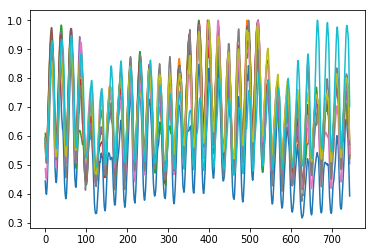

In [6]:
# fig, ax = plt.subplots()
plt.plot(Lt_mon)

# ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#        title='About as simple as it gets, folks')
# ax.grid()

plt.show()

In [7]:
# daily load pattern 
i_day = 1 #day index
assert(i_day <= 31)
i_mic = 2 #micro-grid index
assert(i_mic <= 10)
Lt_day = Lt_mon[(i_day - 1)*24:24*(i_day),i_mic]
# convert to 1-d array 
Lt_day = np.atleast_2d(Lt_day).T
np.shape(Lt_day)

(24, 1)

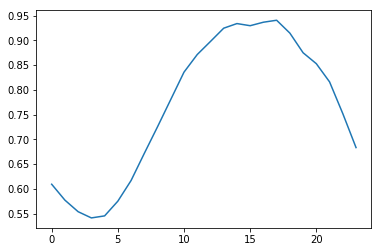

In [8]:
plt.plot(Lt_day)
plt.show()

In [9]:
Sl_dt = sol["solar_data"]
print("type is " + str(type(Sl_dt)))
print("Dims are " + str(np.shape(Sl_dt)))
print("Dataset contains daily solar gen of " + str(np.shape(Sl_dt)[0]),"micro-grids")
Sl_day = Sl_dt[i_day][:]
np.shape(Sl_day)
Sl_day = np.atleast_2d(Sl_day).T
np.shape(Sl_day)

type is <class 'numpy.ndarray'>
Dims are (179038, 24)
Dataset contains daily solar gen of 179038 micro-grids


(24, 1)

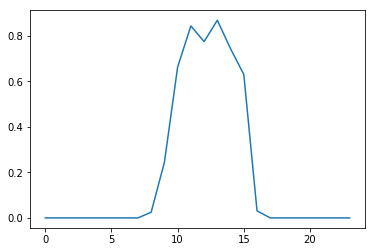

In [10]:
plt.plot(Sl_day)
plt.show()

In [11]:
# compute the net load and introduce penetration pecentage
sl_pn = 0.8
Net_load = Lt_day - sl_pn*Sl_day
# total time slots is the 1 dimension of Net load
T = np.shape(Net_load)[0]
print(np.shape(Net_load))

(24, 1)


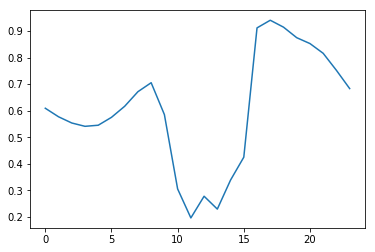

In [12]:
plt.plot(Net_load)
plt.show()

In [13]:
# define the subtraction matrix
Add_mat = np.tril(np.ones((T,T), dtype=int))
Sub_mat = -1*np.eye(T,T, k=-1, dtype=float) + np.eye(T, dtype=float)
np.shape(Sub_mat)
# print(Sub_mat)
print(Add_mat)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [14]:
# print(np.cumsum(Net_load))
print(np.atleast_2d(np.cumsum(Net_load)).T)
np.shape(np.atleast_2d(np.cumsum(Net_load)).T)

[[ 0.60926864]
 [ 1.18641047]
 [ 1.74016134]
 [ 2.28135539]
 [ 2.82664624]
 [ 3.40165389]
 [ 4.01840456]
 [ 4.69000666]
 [ 5.39542422]
 [ 5.98082504]
 [ 6.28624846]
 [ 6.48244789]
 [ 6.76028652]
 [ 6.98973274]
 [ 7.32853037]
 [ 7.75341538]
 [ 8.66535301]
 [ 9.60607671]
 [10.52079515]
 [11.39579549]
 [12.24868715]
 [13.06484453]
 [13.81685678]
 [14.50020888]]


(24, 1)

In [15]:
print(Add_mat@Net_load)

[[ 0.60926864]
 [ 1.18641047]
 [ 1.74016134]
 [ 2.28135539]
 [ 2.82664624]
 [ 3.40165389]
 [ 4.01840456]
 [ 4.69000666]
 [ 5.39542422]
 [ 5.98082504]
 [ 6.28624846]
 [ 6.48244789]
 [ 6.76028652]
 [ 6.98973274]
 [ 7.32853037]
 [ 7.75341538]
 [ 8.66535301]
 [ 9.60607671]
 [10.52079515]
 [11.39579549]
 [12.24868715]
 [13.06484453]
 [13.81685678]
 [14.50020888]]


In [16]:
# the @ operator is matrix multiplication
np.shape(Sub_mat@Net_load)
max_ramp = np.max(Sub_mat@Net_load)
# np.shape(Sub_mat@Net_load)
print(max_ramp)

0.6092686442788742


In [17]:
E_max = 0.8
P_max = 0.52
E_init = 0.2

In [24]:
Bt = cp.Variable((T, 1))
Xt = cp.Variable((T, 1))
ob = cp.Variable()
objective = cp.Minimize(ob)
# objective = cp.Minimize(np.max(np.multiply(Sub_mat,Xt)))
constraints = [P_max <= Bt,
               Bt <= P_max,
              Add_mat@Bt + E_init <= E_max,
              0.1*E_max <= Add_mat@Bt + E_init ,
              ob == np.max(np.dot(Sub_mat,Xt)),
              Xt == Net_load - Bt] # check if dimensions are preserved
prob = cp.Problem(objective, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", Bt.value)

Exception: Cannot evaluate the truth value of a constraint or chain constraints, e.g., 1 >= x >= 0.

In [37]:
np.shape(Xt)

(24, 1)

In [65]:
np.shape(Sub_mat@Xt)

(24, 1)

In [83]:
S_mat = np.absolute(np.dot(Sub_mat,Net_load))
print(S_mat)

[[0.60926864]
 [0.03212682]
 [0.02339096]
 [0.01255682]
 [0.00409681]
 [0.02971679]
 [0.04174302]
 [0.05485142]
 [0.03381547]
 [0.12001674]
 [0.2799774 ]
 [0.10922399]
 [0.0816392 ]
 [0.04839241]
 [0.1093514 ]
 [0.08608739]
 [0.48705261]
 [0.02878607]
 [0.02600525]
 [0.03971811]
 [0.02210867]
 [0.03673428]
 [0.06414513]
 [0.06866016]]


In [81]:
np.max((S_mat))

0.6092686442788742

In [85]:
np.max(np.dot(Sub_mat,Net_load))

0.6092686442788742

In [ ]:
np.shape(Bt)